In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [4]:
Whole_data = pd.read_csv("cleaned.csv")
X_ =pd.read_csv("cleaned.csv")

In [5]:
id=58

In [6]:
X_train=Whole_data[Whole_data['user_id'] == id]

In [7]:
type(X_train)

pandas.core.frame.DataFrame

In [8]:
X_train.head()

,user_id,location_browser_lang,config_browser_engine,config_browser_name,config_device_brand,config_device_model,config_os,config_os_version,config_resolution,location_city,location_country,location_longitude
15,58,58,5,6,0,2,8,16,3,209,15,17.550862
16,58,90,4,3,0,2,8,23,8,203,18,141.395842
17,58,90,1,2,0,2,8,5,2,260,12,-177.514029
18,58,71,5,6,8,2,4,4,6,62,17,-152.348342
19,58,18,5,1,0,2,3,0,17,46,14,-150.169149


In [9]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)


In [10]:
X_train = pd.DataFrame(X_train)
type(X_train)

pandas.core.frame.DataFrame

In [11]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.171664,0.896258,1.661774,-0.471405,-0.316228,0.665912,0.335367,-0.889415,0.596090,-0.027650,0.667240
1,0.0,1.130803,0.192055,-0.107211,-0.471405,-0.316228,0.665912,1.033294,-0.292856,0.510564,0.884802,1.807538
2,0.0,1.130803,-1.920553,-0.696873,-0.471405,-0.316228,0.665912,-0.761374,-1.008727,1.323061,-0.940102,-1.128813
3,0.0,0.561314,0.896258,1.661774,2.121320,-0.316228,-1.426954,-0.861078,-0.531480,-1.499296,0.580651,-0.897101
4,0.0,-1.027259,0.896258,-1.286535,-0.471405,-0.316228,-1.950171,-1.259893,0.780950,-1.727365,-0.331801,-0.877036
5,0.0,1.130803,0.192055,-0.107211,-0.471405,-0.316228,0.665912,1.033294,1.377508,0.653107,2.405555,-0.394694
6,0.0,-0.997286,0.192055,-0.107211,-0.471405,-0.316228,0.665912,1.232702,-1.008727,0.082934,-0.635951,0.283418
7,0.0,1.130803,0.896258,-1.286535,-0.471405,-0.316228,0.665912,0.833886,1.854755,1.180517,-0.635951,-0.645950
8,0.0,-1.117179,-1.920553,-0.696873,2.121320,-0.316228,-1.426954,-1.160190,0.900261,-0.914869,-1.244253,0.096023
9,0.0,-0.997286,-0.512148,1.072113,-0.471405,-0.316228,0.665912,0.833886,-0.173544,-0.701054,-0.635951,-0.716947


In [12]:
X_train.shape

(22, 12)

# user new input

In [13]:
data=[[58,90,1,2,0,2,8,23,22,213,23,-97.783179]]
#make new dataset 

X_test = pd.DataFrame(data)

X_test.shape

(1, 12)

In [14]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler



# sc = StandardScaler()
# X_test = sc.fit_transform(X_test)
# X_test = pd.DataFrame(X_test)
# type(X_test)

In [15]:
X_test = sc.transform(X_test)

In [16]:
X_test

array([[ 0.        ,  1.13080278, -1.9205532 , -0.69687315, -0.47140452,
        -0.31622777,  0.66591209,  1.03329393,  1.37750841,  0.65310732,
         2.4055555 , -0.39469422]])

In [17]:
X_test.shape

(1, 12)

# Making outliers

In [18]:
X_outliers = np.random.uniform(low=-5, high=5, size=(345, 12))

In [19]:
X_outliers.shape

(345, 12)

# Fitting the model

In [20]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)


In [21]:
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

# Predicting within the Train dataframe


In [22]:
y_pred_train = clf.predict(X_train)

In [23]:
unique, counts = np.unique(y_pred_train, return_counts=True)


In [24]:
dict(zip(unique, counts))

{-1.0: 12, 1.0: 10}

In [25]:
y_pred_train.shape

(22,)

# Predicting  for the given input

In [26]:
y_pred_test = clf.predict(X_test)

In [27]:
y_pred_test


array([-1.])

In [30]:
if(y_pred_test == -1):
    print("It's a Anomoly")
else:
    print("It's a regular observation")


It's a Anomoly


# Predicting for the synthe. outliers

In [31]:
y_pred_outliers = clf.predict(X_outliers)

In [32]:
y_pred_outliers.shape

(345,)

In [33]:
unique, counts = np.unique(y_pred_outliers, return_counts=True)

dict(zip(unique, counts))

{-1.0: 345}

# RoC after spliting the train dataframe into 2 parts

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

In [35]:
X_Train, X_Test = train_test_split(X_train,test_size = 0.5,random_state = 42)



In [36]:
X_Train.shape

(11, 12)

In [37]:
X_Test.shape

(11, 12)

In [38]:
#X_Test = X_Test.drop(X_Test.shape[0],axis=0)



In [39]:
X_Test.shape

(11, 12)

In [40]:
clf = svm.OneClassSVM(nu=0.1,kernel = "rbf", gamma =0.1)
y_score = clf.fit(X_Train).decision_function(X_Test)





The desion function tells us on which side of the hyperplane generated by the classifier we are (and how far we are away from it).

In [41]:
pred = clf.predict(X_Train)


In [42]:
unique, counts = np.unique(pred, return_counts=True)

dict(zip(unique, counts))

{-1.0: 5, 1.0: 6}

In [43]:
fpr,tpr,thresholds = roc_curve(pred,y_score)
roc_auc = roc_auc_score(pred,y_score)

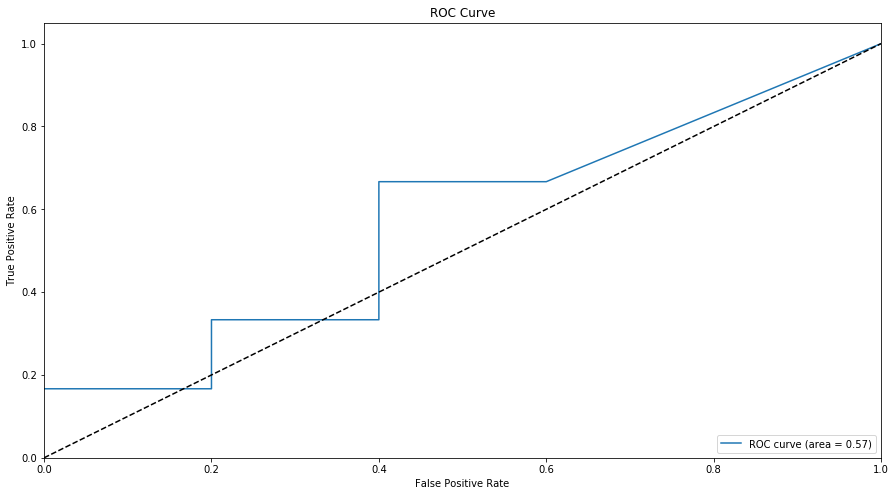

In [44]:
plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Roc for Train data and Outliers

# Risk Calculatoin using the Hard Code

In [45]:
id = data[0][0]
id

58

In [46]:
print("The user id is " +  str(id))

The user id is 58


In [47]:
an=X_[X_['user_id'] == id]

In [48]:
an.head(5)

,user_id,location_browser_lang,config_browser_engine,config_browser_name,config_device_brand,config_device_model,config_os,config_os_version,config_resolution,location_city,location_country,location_longitude
15,58,58,5,6,0,2,8,16,3,209,15,17.550862
16,58,90,4,3,0,2,8,23,8,203,18,141.395842
17,58,90,1,2,0,2,8,5,2,260,12,-177.514029
18,58,71,5,6,8,2,4,4,6,62,17,-152.348342
19,58,18,5,1,0,2,3,0,17,46,14,-150.169149


In [49]:
data

[[58, 90, 1, 2, 0, 2, 8, 23, 22, 213, 23, -97.783179]]

In [50]:
columns = an.columns

In [51]:
data[0][1] in an['location_browser_lang'].unique()

True

In [52]:
an['location_browser_lang'].unique()

array([58, 90, 71, 18, 19, 15])

In [53]:

count=0
nott=0

for i in range(0,12):
    col = columns[i]
    if data[0][i] in an[col].unique():
        count=count+1
        
    else:    
        nott=nott+1
        print("here data is  "+str(data[0][i]) + "   and the dataframe is   "+str(an.iloc[i].unique())  )
        print("\n\n\n")
        

In [54]:
count


12

In [55]:
nott

0

In [56]:
data

[[58, 90, 1, 2, 0, 2, 8, 23, 22, 213, 23, -97.783179]]